In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from scipy import stats

sns.set_theme()
pd.options.mode.chained_assignment = None

In [6]:
def get_graphs_i_need(file_name: str):
    df = pd.read_csv(file_name)
    df["log_population"] = np.log(df["population"])

    df_bears = df[df["species"] == "Bear"] 
    df_deers = df[df['species'] == "Deer"]
    df_grass = df[df['species'] == "Grass"]

    print(f"Deer/Grass R = {np.corrcoef(df_deers['population'], df_grass['population'])[0][1]}")
    print(f"Deer/Bear R = {np.corrcoef(df_deers['population'], df_bears['population'])[0][1]}")

    data_count = max(df[df["species"] == "Deer"]["time"])
    
    # plotting bear/deer/grass population
    plt.figure(figsize=(20, 7))
    plt.title("Populations against Time")

    sns.lineplot(data=df_deers, x="time", y="population", color="b", linewidth=2, label="Deer Population")
    average_deer_population = np.average(df_deers["population"])
    print(f"Average deer population: {average_deer_population}")
    plt.plot([0, data_count], [average_deer_population, average_deer_population], "b--", linewidth=1, label="Average Deer Population")

    sns.lineplot(data=df_grass, x="time", y="population", color="g", linewidth=2, label="Grass Population")
    average_grass_population = np.average(df_grass["population"])
    print(f"Average grass population: {average_grass_population}")
    plt.plot([0, data_count], [average_grass_population, average_grass_population], "g--", linewidth=1, label="Average Grass Population")

    g = sns.lineplot(data=df_bears, x="time", y="population", color="r", linewidth=2, label="Bear Population")
    average_bear_population = np.average(df_bears["population"])
    print(f"Average bear population: {average_bear_population}")
    plt.plot([0, data_count], [average_bear_population, average_bear_population], "r--", linewidth=1, label="Average Bear Population")

    plt.legend()

    g.set(xlabel="Time", ylabel="Population")
    g.axes.set_ylim(0)
    g.axes.set_xlim(0)

    # plotting log bear/deer/grass population

    plt.figure(figsize=(20, 7))
    plt.title("Log Populations against Time")

    sns.lineplot(data=df_deers, x="time", y="log_population", color="b", linewidth=2, label="Deer Population")
    average_deer_population = np.average(df_deers["log_population"])
    print(f"Average deer population: {average_deer_population}")
    plt.plot([0, data_count], [average_deer_population, average_deer_population], "b--", linewidth=1, label="Average Deer Population")

    sns.lineplot(data=df_grass, x="time", y="log_population", color="g", linewidth=2, label="Grass Population")
    average_grass_population = np.average(df_grass["log_population"])
    print(f"Average grass population: {average_grass_population}")
    plt.plot([0, data_count], [average_grass_population, average_grass_population], "g--", linewidth=1, label="Average Grass Population")

    g = sns.lineplot(data=df_bears, x="time", y="log_population", color="r", linewidth=2, label="Bear Population")
    average_bear_population = np.average(df_bears["log_population"])
    print(f"Average bear population: {average_bear_population}")
    plt.plot([0, data_count], [average_bear_population, average_bear_population], "r--", linewidth=1, label="Average Bear Population")

    plt.legend()

    g.set(xlabel="Time", ylabel="Log-Population")
    g.axes.set_ylim(0)
    g.axes.set_xlim(0)

    # traits of deer over time

    plt.figure(figsize=(20, 7))
    plt.title("Deer Speed/Size against Time")
    g = sns.lineplot(data=df_deers, x="time", y="speed", linewidth=2, label="Speed")
    g = sns.lineplot(data=df_deers, x="time", y="size", linewidth=2, label="Size")
    g.set(xlabel="Time", ylabel="Speed/Size")
    g.axes.set_ylim(0)
    g.axes.set_xlim(0)

    average_deer_speed = np.average(df_deers["speed"])
    average_deer_size = np.average(df_deers["size"])

    print(f"Average deer speed: {average_deer_speed}")
    print(f"Average deer size: {average_deer_size}")

    # traits of bear over time
    
    plt.figure(figsize=(20, 7))
    plt.title("Bear Speed/Size against Time")
    g = sns.lineplot(data=df_bears, x="time", y="speed", linewidth=2, label="Speed")
    g = sns.lineplot(data=df_bears, x="time", y="size", linewidth=2, label="Size")
    g.set(xlabel="Time", ylabel="Speed/Size")
    g.axes.set_ylim(0)
    g.axes.set_xlim(0)

    average_bear_speed = np.average(df_bears["speed"])
    average_bear_size = np.average(df_bears["size"])

    print(f"Average bear speed: {average_bear_speed}")
    print(f"Average bear size: {average_bear_size}")

    # Rolling averages are useful for finding long-term trends otherwise disguised by occasional fluctuations. For instance, if your company sells ice, you might notice a fluctuation upwards on hot days
    # https://www.indeed.com/career-advice/career-development/what-is-rolling-average#:~:text=Rolling%20averages%20are%20useful%20for,might%20become%20difficult%20to%20track.

    window_size = 25

    # Deers
    df_deers["birthsSmoothed"] = df_deers["births"].rolling(window_size).mean()
    df_deers["deathsTotalSmoothed"] = df_deers["deathsTotal"].rolling(window_size).mean()
    df_deers["deathsByAgeSmoothed"] = df_deers["deathsByAge"].rolling(window_size).mean()
    df_deers["deathsByThirstSmoothed"] = df_deers["deathsByThirst"].rolling(window_size).mean()
    df_deers["deathsByHungerSmoothed"] = df_deers["deathsByHunger"].rolling(window_size).mean()
    df_deers["deathsByHuntSmoothed"] = df_deers["deathsByHunt"].rolling(window_size).mean()

    plt.figure(figsize=(20, 7))
    plt.title("Deer Births/Deaths against Time (Smoothed)")
    sns.lineplot(data=df_deers, x="time", y="birthsSmoothed", label="Births", linewidth=2)
    g = sns.lineplot(data=df_deers, x="time", y="deathsTotalSmoothed", label="Deaths", linewidth=2)
    g.set(xlabel="Time", ylabel="Births/Deaths")
    g.axes.set_ylim(0)
    g.axes.set_xlim(0)

    plt.figure(figsize=(20, 7))
    plt.title("Deer Births/Deaths by cause against Time (Smoothed)")
    sns.lineplot(data=df_deers, x="time", y="birthsSmoothed", label="Births", linewidth=2, color=sns.color_palette()[0])
    sns.lineplot(data=df_deers, x="time", y="deathsTotalSmoothed", label="Deaths Total", linewidth=2, color=sns.color_palette()[1])
    sns.lineplot(data=df_deers, x="time", y="deathsByAgeSmoothed", label="Deaths by age", linewidth=2, color=sns.color_palette()[2])
    sns.lineplot(data=df_deers, x="time", y="deathsByThirstSmoothed", label="Deaths by thirst", linewidth=2, color=sns.color_palette()[3])
    g = sns.lineplot(data=df_deers, x="time", y="deathsByHungerSmoothed", label="Deaths by hunger", linewidth=2, color=sns.color_palette()[5])
    g = sns.lineplot(data=df_deers, x="time", y="deathsByHuntSmoothed", label="Deaths by hunt", linewidth=2, color=sns.color_palette()[6])

    g.set(xlabel="Time", ylabel="Deaths")
    g.axes.set_ylim(0)
    g.axes.set_xlim(0)

    plt.figure(figsize=(20, 7))
    plt.title("Overall Deer population growth against Time")
    df_deers["netPopulationChange"] = df_deers["births"] - df_deers["deathsTotal"]
    df_deers["netPopulationChangeSmoothed"] = df_deers["netPopulationChange"].rolling(window_size).mean()

    g = sns.lineplot(data=df_deers, x="time", y="netPopulationChangeSmoothed", linewidth=2)
    plt.axhline(y=0, xmin=0, xmax=data_count, color="b", linestyle="--", linewidth=1)
    g.set(xlabel="Time", ylabel="Net Population Change")
    g.axes.set_xlim(0)


    # bears

    df_bears["birthsSmoothed"] = df_bears["births"].rolling(window_size).mean()
    df_bears["deathsTotalSmoothed"] = df_bears["deathsTotal"].rolling(window_size).mean()
    df_bears["deathsByAgeSmoothed"] = df_bears["deathsByAge"].rolling(window_size).mean()
    df_bears["deathsByThirstSmoothed"] = df_bears["deathsByThirst"].rolling(window_size).mean()
    df_bears["deathsByHungerSmoothed"] = df_bears["deathsByHunger"].rolling(window_size).mean()
    df_bears["deathsByHuntSmoothed"] = df_bears["deathsByHunt"].rolling(window_size).mean()

    plt.figure(figsize=(20, 7))
    plt.title("Bear Births/Deaths against Time (Smoothed)")
    sns.lineplot(data=df_bears, x="time", y="birthsSmoothed", label="Births", linewidth=2)
    g = sns.lineplot(data=df_bears, x="time", y="deathsTotalSmoothed", label="Deaths", linewidth=2)
    g.set(xlabel="Time", ylabel="Births/Deaths")
    g.axes.set_ylim(0)
    g.axes.set_xlim(0)

    plt.figure(figsize=(20, 7))
    plt.title("Bear Births/Deaths by cause against Time (Smoothed)")
    sns.lineplot(data=df_bears, x="time", y="birthsSmoothed", label="Births", linewidth=2, color=sns.color_palette()[0])
    sns.lineplot(data=df_bears, x="time", y="deathsTotalSmoothed", label="Deaths Total", linewidth=2, color=sns.color_palette()[1])
    sns.lineplot(data=df_bears, x="time", y="deathsByAgeSmoothed", label="Deaths by age", linewidth=2, color=sns.color_palette()[2])
    sns.lineplot(data=df_bears, x="time", y="deathsByThirstSmoothed", label="Deaths by thirst", linewidth=2, color=sns.color_palette()[3])
    sns.lineplot(data=df_bears, x="time", y="deathsByHungerSmoothed", label="Deaths by hunger", linewidth=2, color=sns.color_palette()[5])
    g = sns.lineplot(data=df_bears, x="time", y="deathsByHunt", label="Deaths by hunt", linewidth=2, color=sns.color_palette()[6])

    g.set(xlabel="Time", ylabel="Deaths")
    g.axes.set_ylim(0)
    g.axes.set_xlim(0)

    plt.figure(figsize=(20, 7))
    plt.title("Overall Bear population growth against Time")
    df_bears["netPopulationChange"] = df_bears["births"] - df_bears["deathsTotal"]
    df_bears["netPopulationChangeSmoothed"] = df_bears["netPopulationChange"].rolling(window_size).mean()

    g = sns.lineplot(data=df_bears, x="time", y="netPopulationChangeSmoothed", linewidth=2)
    plt.axhline(y=0, xmin=0, xmax=data_count, color="b", linestyle="--", linewidth=1)
    g.set(xlabel="Time", ylabel="Net Population Change")
    g.axes.set_xlim(0)

Deer/Grass R = 0.10133042647367113
Deer/Bear R = -0.16504087601380726
Average deer population: 339.2541729893778
Average grass population: 913.3330804248862
Average bear population: 28.31183611532625
Average deer population: 5.783167259375438
Average grass population: 6.815523545532073
Average bear population: 3.3220725070646173
Average deer speed: 0.7897153020485584
Average deer size: 1.537668233915023
Average bear speed: 0.9385081393019726
Average bear size: 1.348434515174507


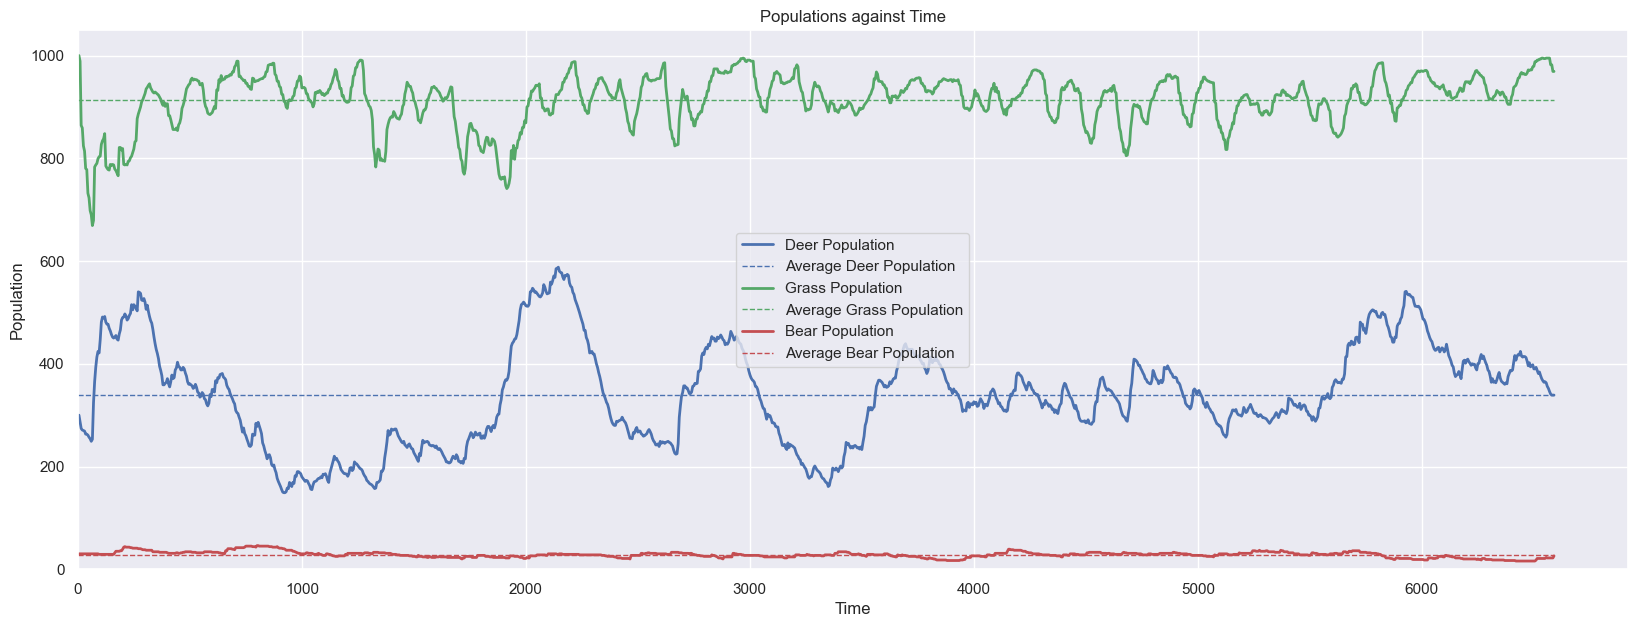

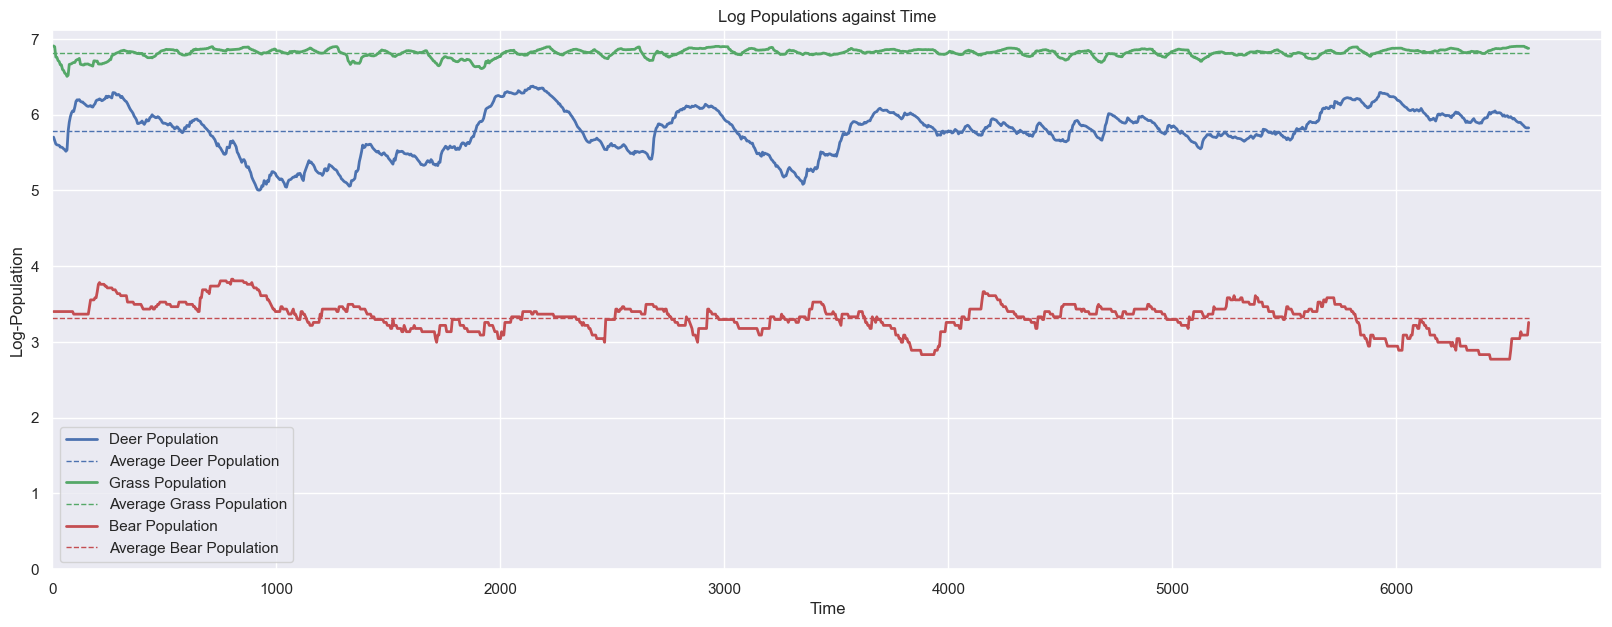

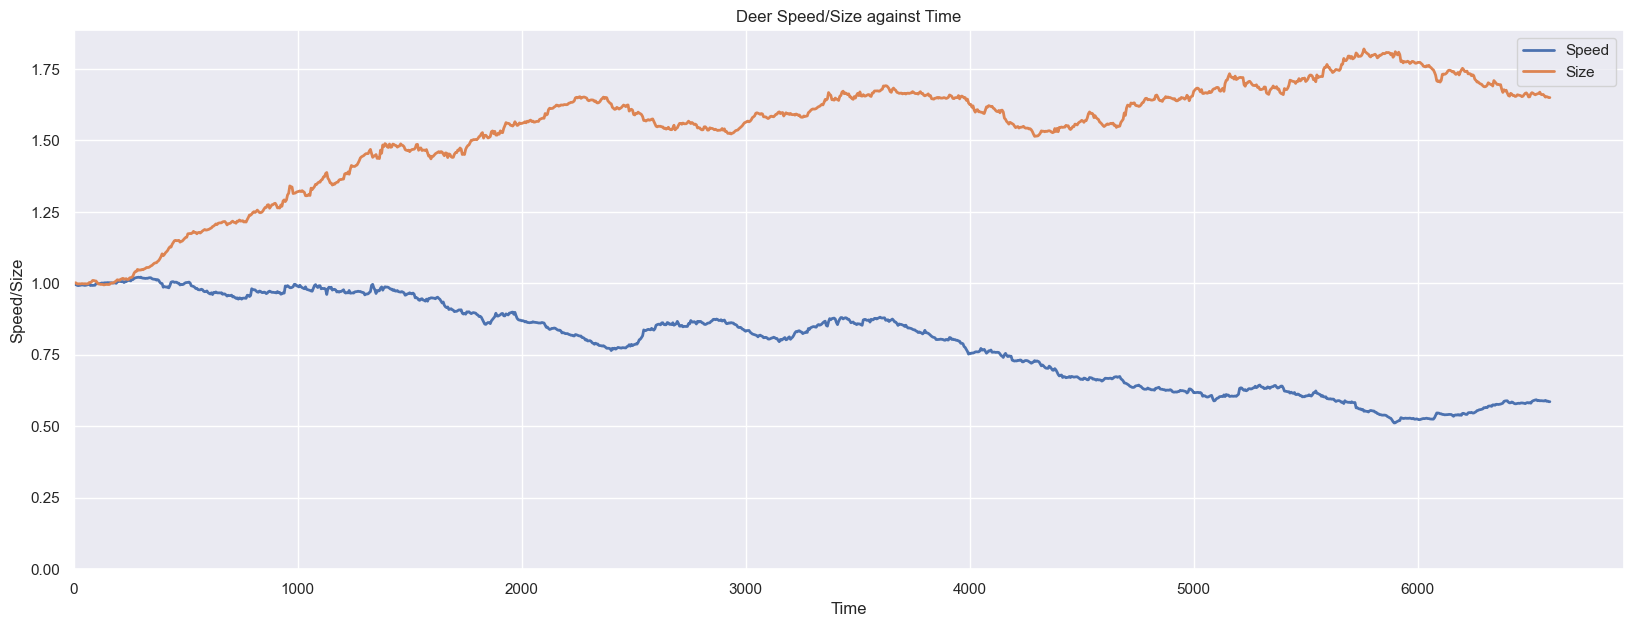

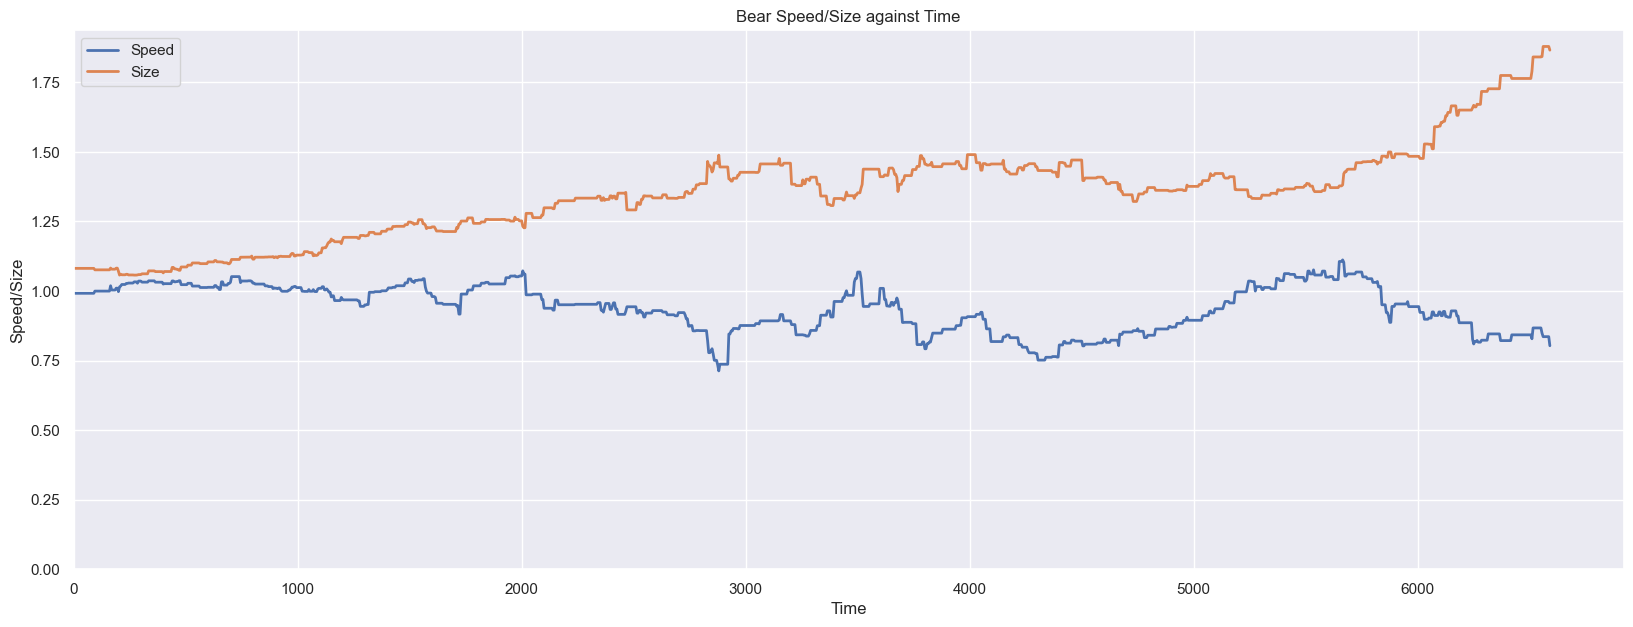

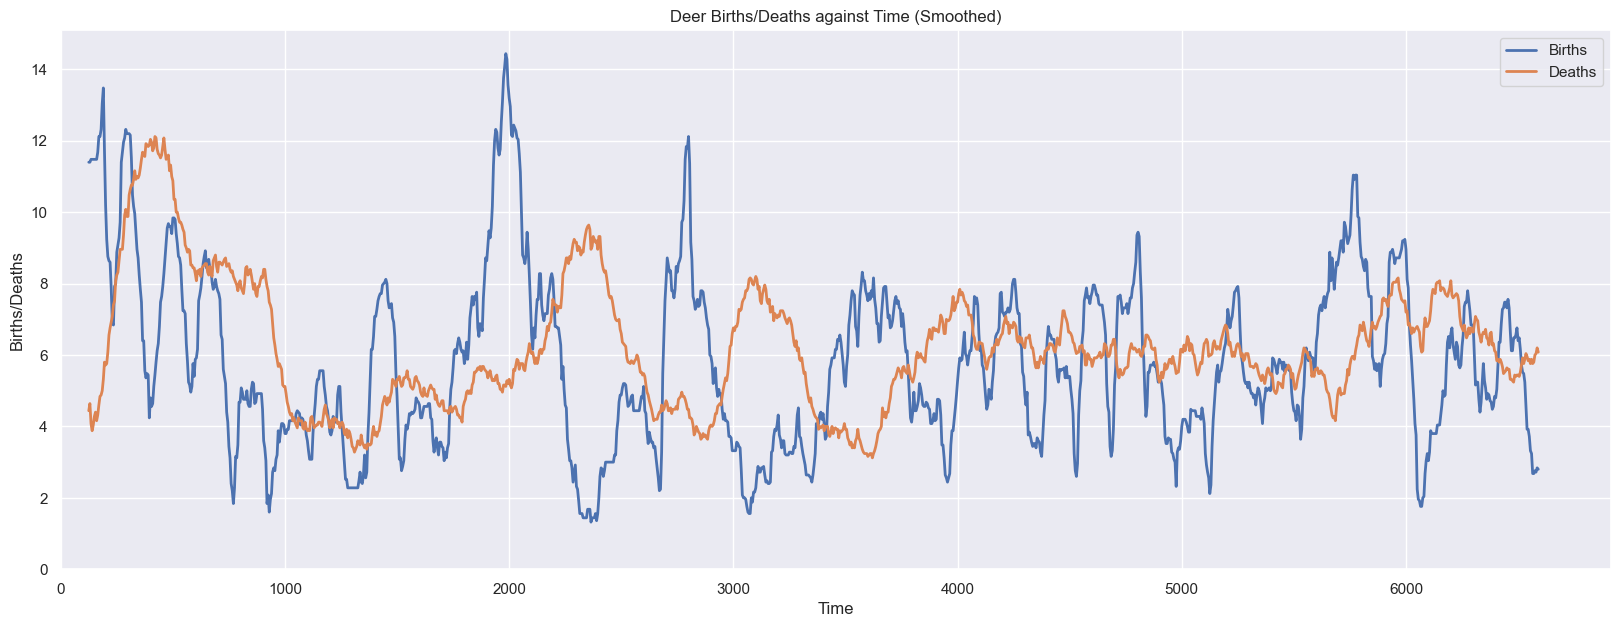

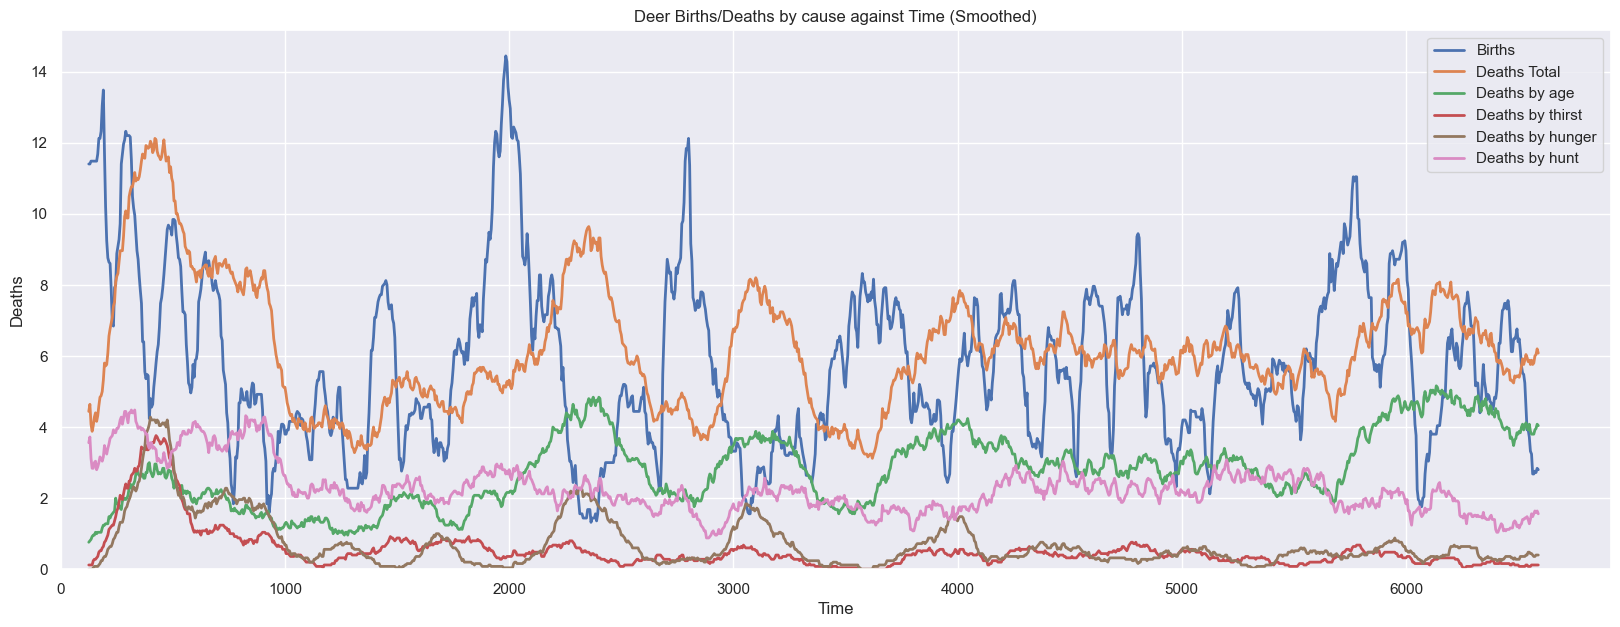

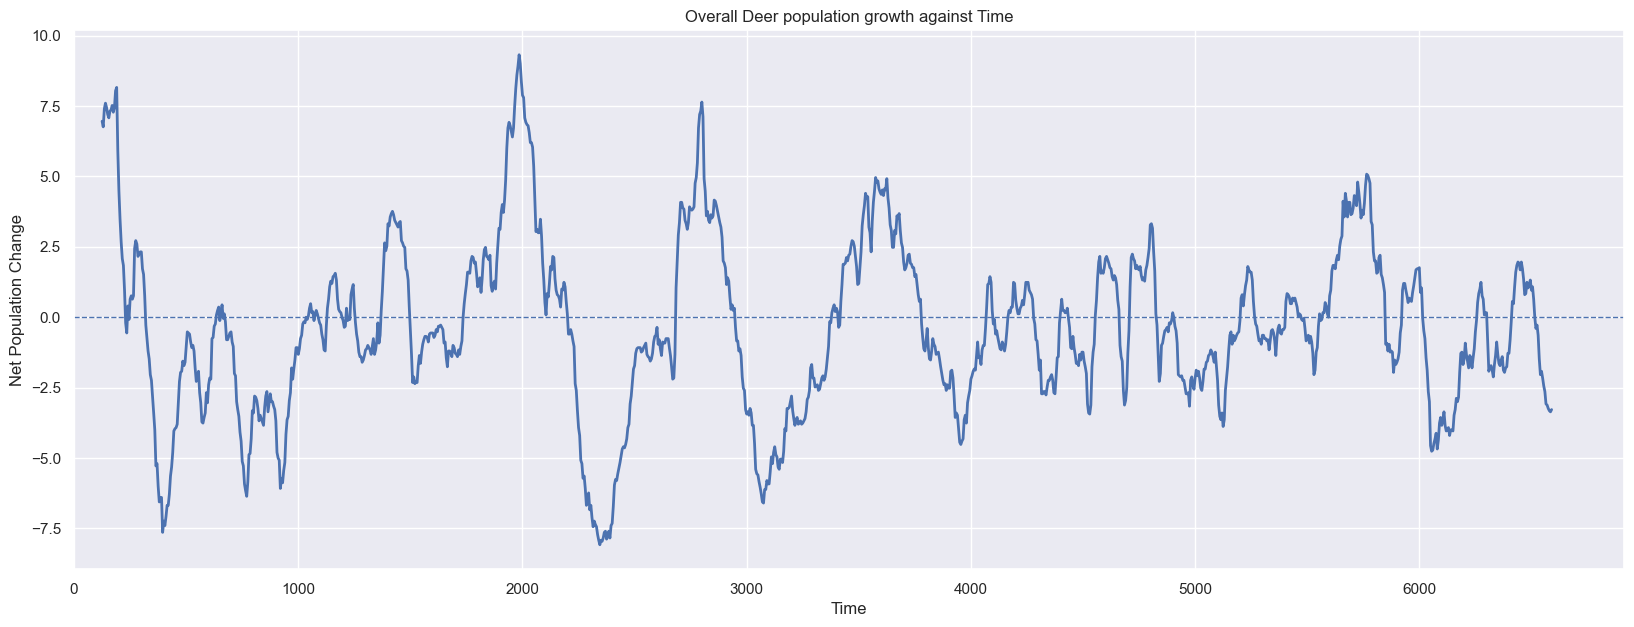

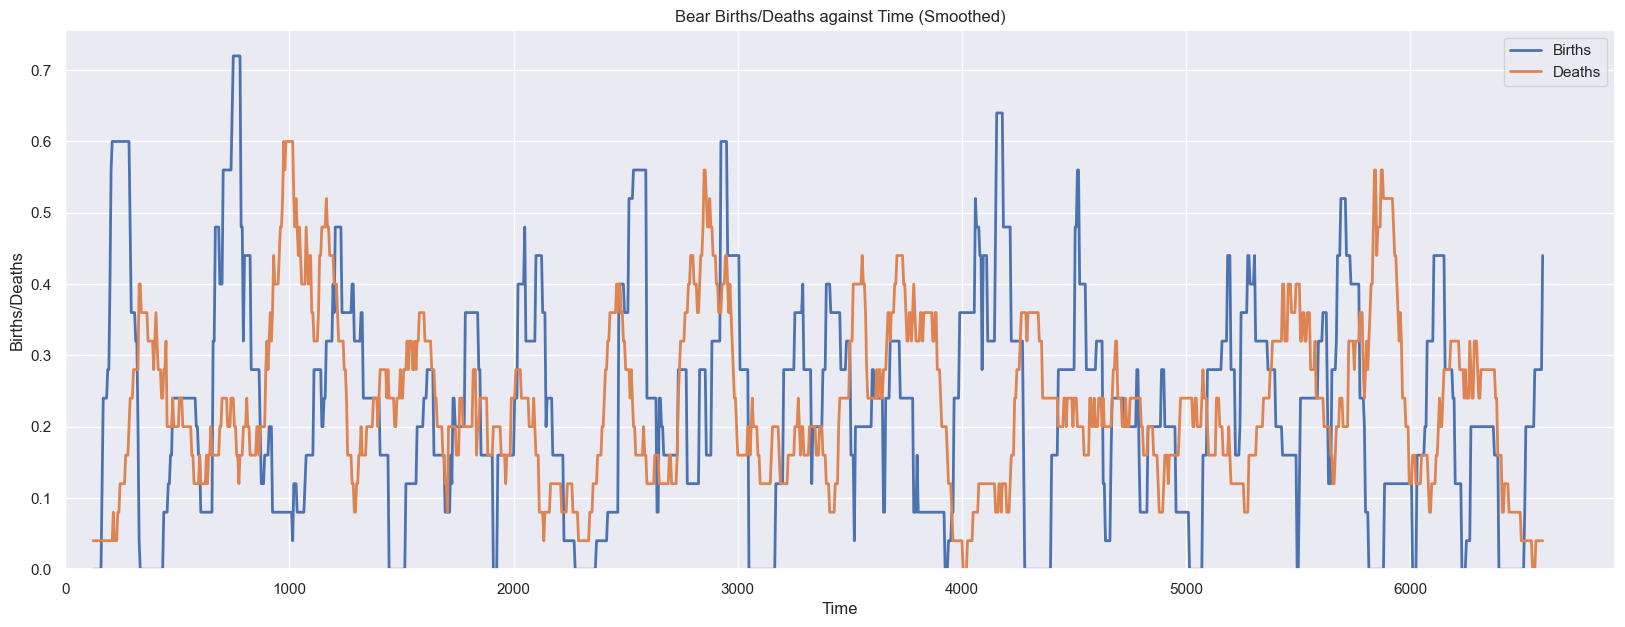

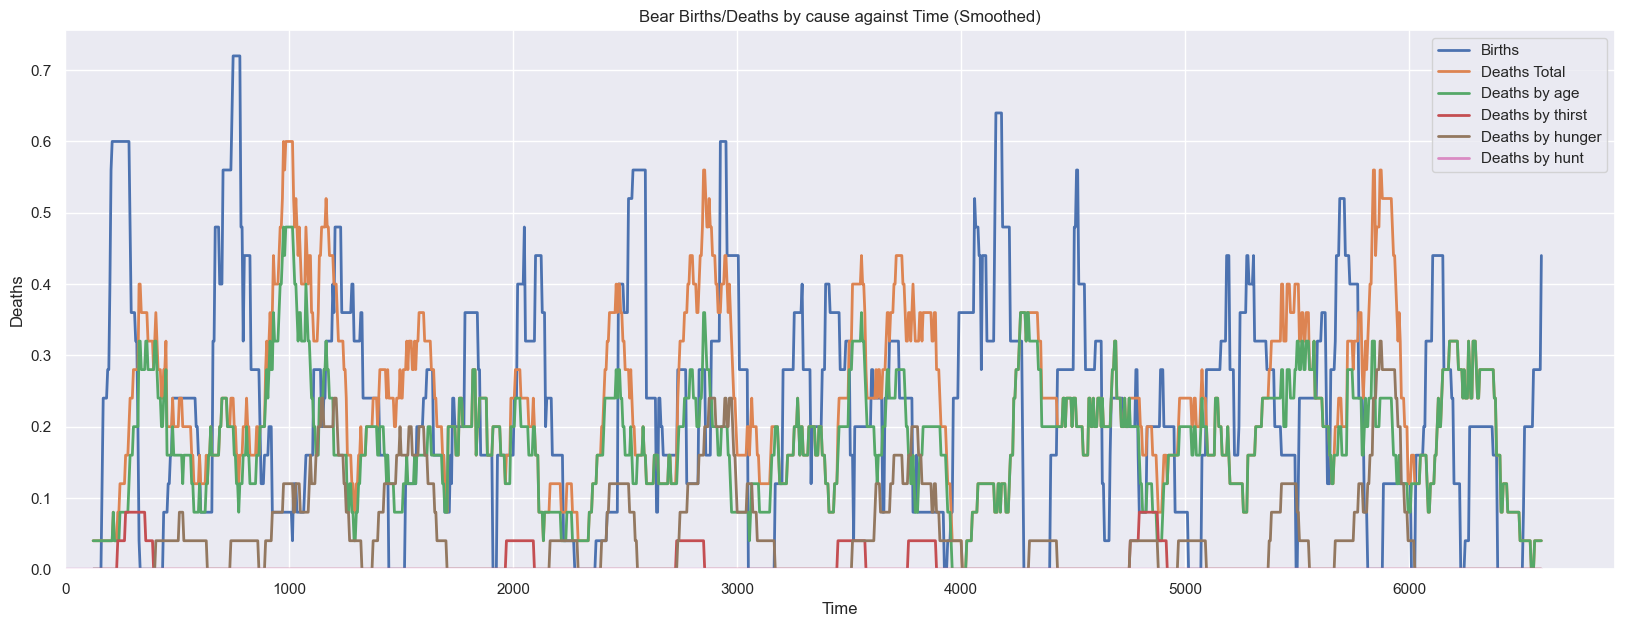

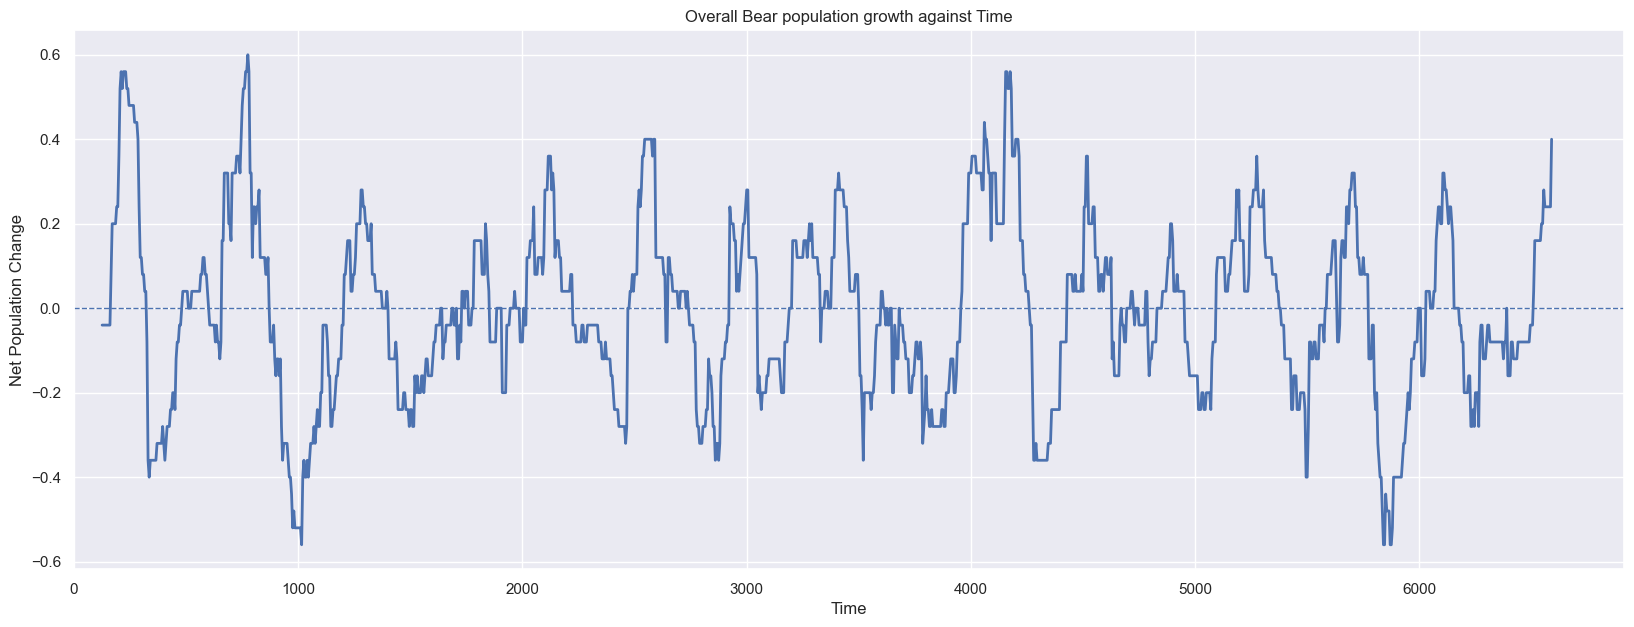

In [7]:
get_graphs_i_need("data/test.csv")